In [4]:
%load_ext autoreload
%autoreload 2
import networkx as nx
import numpy as np
from nxpd import draw, nxpdParams
nxpdParams['show'] = 'ipynb'
from utils import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Problem Set - Temporal Logic
In this problem set, we are going to build a model of a linear temporal logic

1. [LTL Modeling](#ltl-modeling)
2. [LTL to Buchi Automata](#ltl-to-buchi)
3. [LTL to PDDL](#ltl-to-pddl)
  1. [Elevator Example](#elevator-example)
  2. [Elevator Problem Revisited](#elevator-problem)


# LTL Modeling: Modeling a Dog’s Life <a id="ltl-modeling"/>

They say a dog is a man’s best friend. They’re always there for you, willing to let you pet them, ridiculously excited about running after a slobbery tennis ball, and overall pretty great :) This next part of the pset is to develop a set of LTL sentences to model certain aspects of a dog’s life.

If you have any questions on this Part 1 (LTL Modeling), please feel free to email ellies@mit.edu

## Stage 1: Puppy Life <a id="puppy-life" />
Several Hints will be given in stage one to get you started.  

### Statements to Model about Puppies 


#### Modeling Each Condition Seperately

<br/>
<div class="alert alert-info">
Remember that the Logical Operators for LTL are as follows:
</div>

•	and = ^

•	not (just write not)

•	or (just write or)

•	implies = ->

•	if and only if = <->



<br/>
<div class="alert alert-info">

And the Temporal Operators for LTL are as follows: N = next, F = future/eventually, G = global/always, U = until, R = release

</div>

### States:
h = happy, f = being fed, t = going to the bathroom, c = chewing/biting, b = being born, p = being a puppy, r = running




#### Let's model this example together:

•	If a dog is a puppy, it is happy. 

This is representative of the implies condition, stating that whenever the dog is a puppy, it is  happy

p->h is the correct way to model this; 

#### Now it's your turn!

•	A puppy must always be fed at some point in the future, and after a puppy is fed, it must go to the bathroom immediately after it is fed(Think global & future & implies) 

(ignore the fact that it has to be a puppy for this to hold, just for this subproblem - ie, you don't need to do p -> ...)


#### Answer: GF(f -> Nt)

•	The first thing that happens in a dogs’s life is that it is born (Think how to ensure a state is true in the first state)


#### Answer: b

•	When a dog is a puppy, it is chewing something or running. 


#### Answer:  p -> (c or r)

# Stage 2: Adult Doggy Life

### Old States:
h = happy, f = being fed, p = going to the bathroom/peeing, c = chewing/biting, b = being born, p = being a puppy

### Additional States:
a = adult dog, s = sleeping dog, k = hunting, w = hiking

### Statements to Model about Adult Dogs


#### Let's begin by modeling everything seperately again

•	A dog is a puppy until it is an adult dog, at which point it transitions from being a puppy into an adult dog forever


#### Answer: pU(Ga)


•	At any given point in time, there will come another time when the adult dog needs to be fed (Think Always Eventually), but now, it has to go to the bathroom sometime after it is fed, but not necessarily right away after.

(Again, ignore the fact that it has to be an adult dog for this to hold, just for this subproblem)


#### Answer: GF(f -> (Ft ))

•	At any given point, there will come a time in the future when the dog (regardless of whether it is a puppy or adult dog ) needs to sleep 



#### Answer: GF(s)

•	Now, the adult dog must go hunting or hiking at least once at some point in the future


#### Answer: p -> F(k or w) but just F(k or w) is fine if they put that

### Combine
Please combine all the statements now into one statement about dogs modeling these aspects of their life. Be ensure to have distinguishing information for puppies & adult dogs. Some statements apply to just dogs in general. This is kind of tricky, so if it doesn't come to you in more than 10 minutes, feel free to just put down what you have so far and points won't be taken off.

Hint: Setup is something like (information about all dogs) AND (information about puppies UNTIL ALWAYS information about adult dogs).

#### Answer: b ^ GF(s) ^ [ [ p ^ (c or r) ^ F(f -> Nt)^ h ] U G[ a ^ F(f -> Ft)  ] ^ F(k or w) ] - or whatever they have

# LTL to Buchi Automata <a id="ltl-to-buchi"/>

Now that you've had some practice writing LTL formulas, we are going to practice converting some simple LTL formulas to Buchi automata. Buchi automata are extensions of finite state machines used to capture temporal goals expressed by LTL on an infinite timeline. Converting LTL to Buchi automata is the first step to generating actual plans with temporally extended goals.

In this section, we will be using the Python library NetworkX for building graphs and nxpd for drawing graphs. The examples below should be enough to create your graphs but you can find the documentation here: https://networkx.readthedocs.io/en/stable/

## LTL Operators to Buchi Automata

In lecture, we saw how to convert a couple of the LTL operators to Buchi automata. To get started, we are just going to convert the rest of the LTL operators to Buchi automata. You can find the examples of LTL operators converted in lecture below. (Note: We will use '!' to represent the logical operator "not")

**F**uture - **F**p

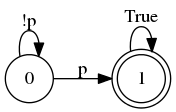

In [5]:
F = nx.DiGraph()
F.graph['rankdir'] = 'LR' #Graph should be drawn left to right
F.add_node(0, shape='circle')
F.add_node(1, shape='doublecircle')
F.add_edge(1, 1, label = 'True')
F.add_edge(0, 1, label = 'p')
F.add_edge(0, 0, label = '!p')
draw(F)

**G**lobally - **G**p

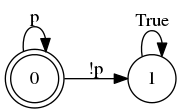

In [6]:
G = nx.DiGraph()
G.graph['rankdir'] = 'LR' #Graph should be drawn left to right
G.add_node(0, shape='doublecircle')
G.add_node(1, shape='circle')
G.add_edge(1, 1, label = 'True')
G.add_edge(0, 1, label = '!p')
G.add_edge(0, 0, label = 'p')
draw(G)

<div class="alert alert-info">
Convert the following LTL operators to Buchi automata.
</div>

Ne**X**t - **X**p

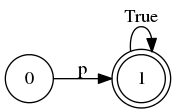

In [7]:
X = nx.DiGraph()
X.graph['rankdir'] = 'LR'
X.add_node(0, shape='circle')
X.add_node(1, shape='doublecircle')
X.add_edge(0,1, label='p')
X.add_edge(1,1, label='True')
draw(X)

**U**ntil - p**U**q

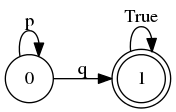

In [8]:
U = nx.DiGraph()
U.graph['rankdir'] = 'LR'
U.add_node(0, shape='circle')
U.add_node(1, shape='doublecircle')
U.add_edge(0,1, label='q')
U.add_edge(1,1, label='True')
U.add_edge(0,0, label='p')
draw(U)

**R**elease - p**R**w

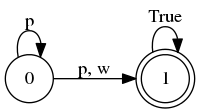

In [9]:
R = nx.DiGraph()
R.graph['rankdir'] = 'LR'
R.add_node(0, shape='circle')
R.add_node(1, shape='doublecircle')
R.add_edge(0,1, label='p, w')
R.add_edge(1,1, label='True')
R.add_edge(0,0, label='p')
draw(R)

## LTL Formulas to Buchi Automata
LTL operators can be combined into formulas to express more complex logical statements. Let's return to the traffic light example from lecture.

Example: The at some point the traffic light is going to break at remain red forever.

**FG** r

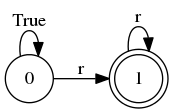

In [10]:
FG = nx.DiGraph()
FG.graph['rankdir'] = 'LR'
FG.add_node(0, shape = 'circle')
FG.add_node(1, shape = 'doublecircle')
FG.add_edge(0,1, label = 'r')
FG.add_edge(0, 0, label = 'True')
FG.add_edge(1, 1, label = 'r')
draw(FG)

<div class="alert alert-info">
Convert the following LTL formulas to Buchi automata.
</div>

In two states from now, the traffic light is going to turn green.

**XX** g

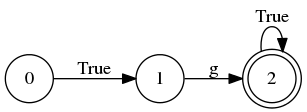

In [10]:
XX = nx.DiGraph()
XX.graph['rankdir'] = 'LR'
XX.add_node(0, shape='circle')
XX.add_node(1, shape='circle')
XX.add_node(2, shape='doublecircle')
XX.add_edge(0,1, label='True')
XX.add_edge(1,2, label='g')
XX.add_edge(2,2, label='True')
draw(XX)

The traffic light is always red until it turns green and the light must be green inifinitely often.

**G**(r **U** g) $\wedge$ **GF** g

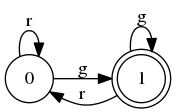

In [11]:
GUGF = nx.DiGraph()
GUGF.graph['rankdir'] = 'LR'
GUGF.add_node(0, shape='circle')
GUGF.add_node(1, shape='doublecircle')
GUGF.add_edge(0, 0, label= 'r')
GUGF.add_edge(1,0, label= 'r')
GUGF.add_edge(0,1, label='g')
GUGF.add_edge(1,1, label='g')
draw(GUGF)

(Optional) Once the light is green, the light cannot become red immediately.

**G** (g $\Rightarrow$ $\neg$**X** r)

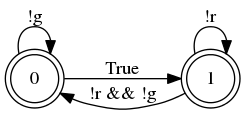

In [12]:
GX = nx.DiGraph()
GX.graph['rankdir'] = 'LR'
GX.add_node(0, shape='doublecircle')
GX.add_node(1, shape='doublecircle')
GX.add_edge(0, 0, label= '!g')
GX.add_edge(1,0, label= '!r && !g')
GX.add_edge(0,1, label='True')
GX.add_edge(1,1, label='!r')
draw(GX)

# LTL to PDDL <a id="ltl-to-pddl"/>

Generally, PDDL 2.2, which we are going to use, does not support temporal logic modal operators without additional predicates and functions. In this section, we are going to implement additional predicates and functions that allow us to specify LTL goals and constraints in PDDL 2.2.

## Elevator Example <a id="elevator-example"/>
Recall the elevator problem where there are four elevators, two fast elevators and two slow elevators each with different reachable floors and capacities, delivering passengers in a nine-floor building. To begin, we are going to incorperate some temporal components into the our elevator plan *goals*.


Try running the elevator problem in the `example` folder using `planviz` _without_ any goal modification, and observe the sequence of actions in the output plan.<br/>

Run the solver on the domain and problem file (`domain-elevators-al.pddl` and `prob-elevators-al.pddl`) using following command

<code>optic-clp -N /path_to/domain-elevators-al.pddl /path_to/prob-elevators-al.pddl | planviz.py
</code>

<br/>
<div class="alert alert-info">
Copy the generated plan in the 'Activities' box from the bottom of the Plan Visualizer page and assign it into the activities variable in the code box below
</div>

In [14]:
activities = [{"duration": 1.0, "time_start": 0.0, "id": 0, "activity": "(board p0 fast0 n2 n0 n1)"}, {"duration": 11.0, "time_start": 0.0, "id": 1, "activity": "(move-down-fast fast1 n2 n0)"}, {"duration": 12.0, "time_start": 0.0, "id": 2, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 12.0, "time_start": 0.0, "id": 3, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 15.0, "time_start": 1.0, "id": 4, "activity": "(move-up-fast fast0 n2 n8)"}, {"duration": 1.0, "time_start": 11.0, "id": 5, "activity": "(board p6 fast1 n0 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 6, "activity": "(board p5 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 7, "activity": "(board p2 slow0-0 n1 n0 n1)"}, {"duration": 15.0, "time_start": 12.0, "id": 8, "activity": "(move-up-fast fast1 n0 n6)"}, {"duration": 12.0, "time_start": 13.0, "id": 9, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 12.0, "time_start": 13.0, "id": 10, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 16.0, "id": 11, "activity": "(leave p0 fast0 n8 n1 n0)"}, {"duration": 11.0, "time_start": 17.0, "id": 12, "activity": "(move-down-fast fast0 n8 n6)"}, {"duration": 1.0, "time_start": 25.0, "id": 13, "activity": "(leave p5 slow1-0 n5 n1 n0)"}, {"duration": 1.0, "time_start": 25.0, "id": 14, "activity": "(leave p2 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 26.0, "id": 15, "activity": "(collect-goal-passenger-at p0 n8)"}, {"duration": 12.0, "time_start": 26.0, "id": 16, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 12.0, "time_start": 26.0, "id": 17, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 0.001, "time_start": 26.001, "id": 18, "activity": "(collect-goal-passenger-at p5 n5)"}, {"duration": 1.0, "time_start": 27.0, "id": 19, "activity": "(leave p6 fast1 n6 n1 n0)"}, {"duration": 1.0, "time_start": 28.0, "id": 20, "activity": "(board p1 fast0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 28.001, "id": 21, "activity": "(board p4 fast1 n6 n0 n1)"}, {"duration": 15.0, "time_start": 29.0, "id": 22, "activity": "(move-down-fast fast0 n6 n0)"}, {"duration": 15.0, "time_start": 29.001, "id": 23, "activity": "(move-down-fast fast1 n6 n0)"}, {"duration": 1.0, "time_start": 38.0, "id": 24, "activity": "(board p6 slow1-0 n6 n0 n1)"}, {"duration": 12.0, "time_start": 38.001, "id": 25, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 12.0, "time_start": 39.0, "id": 26, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 1.0, "time_start": 44.0, "id": 27, "activity": "(leave p1 fast0 n0 n1 n0)"}, {"duration": 1.0, "time_start": 44.001, "id": 28, "activity": "(leave p4 fast1 n0 n1 n0)"}, {"duration": 1.0, "time_start": 45.001, "id": 29, "activity": "(board p2 fast0 n0 n0 n1)"}, {"duration": 15.0, "time_start": 46.001, "id": 30, "activity": "(move-up-fast fast0 n0 n6)"}, {"duration": 1.0, "time_start": 50.001, "id": 31, "activity": "(board p1 slow0-0 n0 n0 n1)"}, {"duration": 1.0, "time_start": 51.0, "id": 32, "activity": "(leave p6 slow1-0 n5 n1 n0)"}, {"duration": 12.0, "time_start": 51.001, "id": 33, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 0.001, "time_start": 52.0, "id": 34, "activity": "(collect-goal-passenger-at p4 n0)"}, {"duration": 12.0, "time_start": 52.0, "id": 35, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 0.001, "time_start": 52.001, "id": 36, "activity": "(collect-goal-passenger-at p6 n5)"}, {"duration": 1.0, "time_start": 61.001, "id": 37, "activity": "(leave p2 fast0 n6 n1 n0)"}, {"duration": 11.0, "time_start": 62.001, "id": 38, "activity": "(move-down-fast fast0 n6 n4)"}, {"duration": 1.0, "time_start": 63.001, "id": 39, "activity": "(leave p1 slow0-0 n1 n1 n0)"}, {"duration": 1.0, "time_start": 64.0, "id": 40, "activity": "(board p2 slow1-0 n6 n0 n1)"}, {"duration": 12.0, "time_start": 64.001, "id": 41, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 12.0, "time_start": 65.0, "id": 42, "activity": "(move-up-slow slow1-0 n6 n7)"}, {"duration": 28.0, "time_start": 76.002, "id": 43, "activity": "(move-up-slow slow0-0 n0 n3)"}, {"duration": 1.0, "time_start": 77.0, "id": 44, "activity": "(leave p2 slow1-0 n7 n1 n0)"}, {"duration": 0.001, "time_start": 78.001, "id": 45, "activity": "(collect-goal-passenger-at p2 n7)"}, {"duration": 0.001, "time_start": 78.002, "id": 46, "activity": "(collect-goal-passenger-at p1 n1)"}, {"duration": 1.0, "time_start": 104.002, "id": 47, "activity": "(board p3 slow0-0 n3 n0 n1)"}, {"duration": 12.0, "time_start": 105.002, "id": 48, "activity": "(move-up-slow slow0-0 n3 n4)"}, {"duration": 1.0, "time_start": 117.002, "id": 49, "activity": "(leave p3 slow0-0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 118.003, "id": 50, "activity": "(board p3 fast0 n4 n0 n1)"}, {"duration": 13.0, "time_start": 119.003, "id": 51, "activity": "(move-down-fast fast0 n4 n0)"}, {"duration": 1.0, "time_start": 132.003, "id": 52, "activity": "(leave p3 fast0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 133.004, "id": 53, "activity": "(collect-goal-passenger-at p3 n0)"}]
solution = [{"duration": 1.0, "time_start": 0.0, "id": 0, "activity": "(board p0 fast0 n2 n0 n1)"}, {"duration": 11.0, "time_start": 0.0, "id": 1, "activity": "(move-down-fast fast1 n2 n0)"}, {"duration": 12.0, "time_start": 0.0, "id": 2, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 12.0, "time_start": 0.0, "id": 3, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 15.0, "time_start": 1.0, "id": 4, "activity": "(move-up-fast fast0 n2 n8)"}, {"duration": 1.0, "time_start": 11.0, "id": 5, "activity": "(board p6 fast1 n0 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 6, "activity": "(board p5 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 7, "activity": "(board p2 slow0-0 n1 n0 n1)"}, {"duration": 15.0, "time_start": 12.0, "id": 8, "activity": "(move-up-fast fast1 n0 n6)"}, {"duration": 12.0, "time_start": 13.0, "id": 9, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 12.0, "time_start": 13.0, "id": 10, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 16.0, "id": 11, "activity": "(leave p0 fast0 n8 n1 n0)"}, {"duration": 11.0, "time_start": 17.0, "id": 12, "activity": "(move-down-fast fast0 n8 n6)"}, {"duration": 1.0, "time_start": 25.0, "id": 13, "activity": "(leave p5 slow1-0 n5 n1 n0)"}, {"duration": 1.0, "time_start": 25.0, "id": 14, "activity": "(leave p2 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 26.0, "id": 15, "activity": "(collect-goal-passenger-at p0 n8)"}, {"duration": 12.0, "time_start": 26.0, "id": 16, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 12.0, "time_start": 26.0, "id": 17, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 0.001, "time_start": 26.001, "id": 18, "activity": "(collect-goal-passenger-at p5 n5)"}, {"duration": 1.0, "time_start": 27.0, "id": 19, "activity": "(leave p6 fast1 n6 n1 n0)"}, {"duration": 1.0, "time_start": 28.0, "id": 20, "activity": "(board p1 fast0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 28.001, "id": 21, "activity": "(board p4 fast1 n6 n0 n1)"}, {"duration": 15.0, "time_start": 29.0, "id": 22, "activity": "(move-down-fast fast0 n6 n0)"}, {"duration": 15.0, "time_start": 29.001, "id": 23, "activity": "(move-down-fast fast1 n6 n0)"}, {"duration": 1.0, "time_start": 38.0, "id": 24, "activity": "(board p6 slow1-0 n6 n0 n1)"}, {"duration": 12.0, "time_start": 38.001, "id": 25, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 12.0, "time_start": 39.0, "id": 26, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 1.0, "time_start": 44.0, "id": 27, "activity": "(leave p1 fast0 n0 n1 n0)"}, {"duration": 1.0, "time_start": 44.001, "id": 28, "activity": "(leave p4 fast1 n0 n1 n0)"}, {"duration": 1.0, "time_start": 45.001, "id": 29, "activity": "(board p2 fast0 n0 n0 n1)"}, {"duration": 15.0, "time_start": 46.001, "id": 30, "activity": "(move-up-fast fast0 n0 n6)"}, {"duration": 1.0, "time_start": 50.001, "id": 31, "activity": "(board p1 slow0-0 n0 n0 n1)"}, {"duration": 1.0, "time_start": 51.0, "id": 32, "activity": "(leave p6 slow1-0 n5 n1 n0)"}, {"duration": 12.0, "time_start": 51.001, "id": 33, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 0.001, "time_start": 52.0, "id": 34, "activity": "(collect-goal-passenger-at p4 n0)"}, {"duration": 12.0, "time_start": 52.0, "id": 35, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 0.001, "time_start": 52.001, "id": 36, "activity": "(collect-goal-passenger-at p6 n5)"}, {"duration": 1.0, "time_start": 61.001, "id": 37, "activity": "(leave p2 fast0 n6 n1 n0)"}, {"duration": 11.0, "time_start": 62.001, "id": 38, "activity": "(move-down-fast fast0 n6 n4)"}, {"duration": 1.0, "time_start": 63.001, "id": 39, "activity": "(leave p1 slow0-0 n1 n1 n0)"}, {"duration": 1.0, "time_start": 64.0, "id": 40, "activity": "(board p2 slow1-0 n6 n0 n1)"}, {"duration": 12.0, "time_start": 64.001, "id": 41, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 12.0, "time_start": 65.0, "id": 42, "activity": "(move-up-slow slow1-0 n6 n7)"}, {"duration": 28.0, "time_start": 76.002, "id": 43, "activity": "(move-up-slow slow0-0 n0 n3)"}, {"duration": 1.0, "time_start": 77.0, "id": 44, "activity": "(leave p2 slow1-0 n7 n1 n0)"}, {"duration": 0.001, "time_start": 78.001, "id": 45, "activity": "(collect-goal-passenger-at p2 n7)"}, {"duration": 0.001, "time_start": 78.002, "id": 46, "activity": "(collect-goal-passenger-at p1 n1)"}, {"duration": 1.0, "time_start": 104.002, "id": 47, "activity": "(board p3 slow0-0 n3 n0 n1)"}, {"duration": 12.0, "time_start": 105.002, "id": 48, "activity": "(move-up-slow slow0-0 n3 n4)"}, {"duration": 1.0, "time_start": 117.002, "id": 49, "activity": "(leave p3 slow0-0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 118.003, "id": 50, "activity": "(board p3 fast0 n4 n0 n1)"}, {"duration": 13.0, "time_start": 119.003, "id": 51, "activity": "(move-down-fast fast0 n4 n0)"}, {"duration": 1.0, "time_start": 132.003, "id": 52, "activity": "(leave p3 fast0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 133.004, "id": 53, "activity": "(collect-goal-passenger-at p3 n0)"}]

You can check whether two activity objects are the same using `check_equal(activities1, activities2)` as following

In [15]:
check_equal(activities, solution)
test_ok()

Tests passed!!

We'll introduce some example predicates augmented to the problem to demonstrate the LTL modeling in PDDL.

* `(at-goal-next ?a - passenger ?b - passenger)` - true when passenger `a` gets to his destination _right after_ `b` does
* `(at-goal-sometime-before ?a - passenger ?b - passenger)` - true when passenger `a` gets to his goal _sometime before_ `b` does
* `(at-goal-sometime-after ?a - passenger ?b - passenger)` - true when passenger `a` gets to his goal _sometime after_ `b` does
* `(never-move-fast)` - true when fast elevators are _never_ used (no elevator ever moves fast)
* `(never-move-slow)` - true when slow elevators are _never_ used (no elevator ever moves slow)
* `(move-fast-until-collected ?a - passenger)` - true when only fast elevators are used _until_ passenger `a` reached his goal, then only slow elevator will be used

Now, consider the following scenario:

> "Donald Duck (`p0`) is in our building! Mr.Duck is here for a special comedy show and he needs a quiet time to prepare for his show, which starts right after everyone gets to the target floors. Unfortunately, the fast elevators are being very loud so he requests that everyone **always** uses the _slow_ elevators"

You, as the building elevator moderator, are appointed to find a plan that deliver everyone, including Mr. Duck, to their intended destinations with minimum total-cost while satisfing his request. Each passenger's destination in this scenario is identical to the one in the original problem. 

<br/>
<div class="alert alert-warning">
**Important!** In this [Elevator Example](#elevator-example) section, you do *not* need to modify any other part of the problem file but the `:goal` clause
</div>

<div class="alert alert-info">
Modify the **goal description** in the `prob-elevators-al.pddl` file in the example folder. 
</div>

<div class="alert alert-info">
Run the solver on the domain file (`domain-elevators-al.pddl`) and your modified `prob-elevators-al.pddl`.<br/>
Copy the text from the bottom of the Plan Visualizer page into the code box below
</div>

In [18]:
activities = [{"duration": 12.0, "time_start": 0.0, "id": 0, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 12.0, "time_start": 0.0, "id": 1, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 1.0, "time_start": 0.0, "id": 2, "activity": "(board p0 fast0 n2 n0 n1)"}, {"duration": 1.0, "time_start": 1.001, "id": 3, "activity": "(leave p0 fast0 n2 n1 n0)"}, {"duration": 1.0, "time_start": 12.0, "id": 4, "activity": "(board p5 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 5, "activity": "(board p2 slow0-0 n1 n0 n1)"}, {"duration": 12.0, "time_start": 13.0, "id": 6, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 12.0, "time_start": 13.0, "id": 7, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 25.0, "id": 8, "activity": "(leave p5 slow1-0 n5 n1 n0)"}, {"duration": 36.0, "time_start": 25.001, "id": 9, "activity": "(move-up-slow slow0-0 n0 n4)"}, {"duration": 20.0, "time_start": 26.0, "id": 10, "activity": "(move-up-slow slow1-0 n5 n7)"}, {"duration": 12.0, "time_start": 46.001, "id": 11, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 1.0, "time_start": 58.001, "id": 12, "activity": "(board p1 slow1-0 n6 n0 n1)"}, {"duration": 20.0, "time_start": 59.001, "id": 13, "activity": "(move-down-slow slow1-0 n6 n4)"}, {"duration": 1.0, "time_start": 61.001, "id": 14, "activity": "(leave p2 slow0-0 n4 n1 n0)"}, {"duration": 12.0, "time_start": 62.001, "id": 15, "activity": "(move-down-slow slow0-0 n4 n3)"}, {"duration": 1.0, "time_start": 74.001, "id": 16, "activity": "(board p3 slow0-0 n3 n0 n1)"}, {"duration": 12.0, "time_start": 75.001, "id": 17, "activity": "(move-up-slow slow0-0 n3 n4)"}, {"duration": 1.0, "time_start": 79.001, "id": 18, "activity": "(board p2 slow1-0 n4 n1 n2)"}, {"duration": 1.0, "time_start": 80.002, "id": 19, "activity": "(leave p1 slow1-0 n4 n2 n1)"}, {"duration": 28.0, "time_start": 81.002, "id": 20, "activity": "(move-up-slow slow1-0 n4 n7)"}, {"duration": 1.0, "time_start": 87.001, "id": 21, "activity": "(board p1 slow0-0 n4 n1 n2)"}, {"duration": 28.0, "time_start": 88.001, "id": 22, "activity": "(move-down-slow slow0-0 n4 n1)"}, {"duration": 1.0, "time_start": 109.002, "id": 23, "activity": "(leave p2 slow1-0 n7 n1 n0)"}, {"duration": 12.0, "time_start": 110.002, "id": 24, "activity": "(move-up-slow slow1-0 n7 n8)"}, {"duration": 1.0, "time_start": 116.001, "id": 25, "activity": "(leave p1 slow0-0 n1 n2 n1)"}, {"duration": 0.001, "time_start": 117.001, "id": 26, "activity": "(collect-goal-passenger-at p5 n5)"}, {"duration": 12.0, "time_start": 117.001, "id": 27, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 0.001, "time_start": 117.002, "id": 28, "activity": "(collect-goal-passenger-at p1 n1)"}, {"duration": 36.0, "time_start": 122.003, "id": 29, "activity": "(move-down-slow slow1-0 n8 n4)"}, {"duration": 1.0, "time_start": 129.001, "id": 30, "activity": "(leave p3 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 130.002, "id": 31, "activity": "(collect-goal-passenger-at p3 n0)"}, {"duration": 1.0, "time_start": 130.002, "id": 32, "activity": "(board p6 slow0-0 n0 n0 n1)"}, {"duration": 0.001, "time_start": 130.003, "id": 33, "activity": "(collect-goal-passenger-at p2 n7)"}, {"duration": 36.0, "time_start": 131.002, "id": 34, "activity": "(move-up-slow slow0-0 n0 n4)"}, {"duration": 1.0, "time_start": 167.002, "id": 35, "activity": "(leave p6 slow0-0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 168.003, "id": 36, "activity": "(board p6 slow1-0 n4 n0 n1)"}, {"duration": 12.0, "time_start": 169.003, "id": 37, "activity": "(move-up-slow slow1-0 n4 n5)"}, {"duration": 1.0, "time_start": 181.003, "id": 38, "activity": "(leave p6 slow1-0 n5 n1 n0)"}, {"duration": 12.0, "time_start": 182.003, "id": 39, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 1.0, "time_start": 194.003, "id": 40, "activity": "(board p4 slow1-0 n6 n0 n1)"}, {"duration": 20.0, "time_start": 195.003, "id": 41, "activity": "(move-down-slow slow1-0 n6 n4)"}, {"duration": 1.0, "time_start": 215.003, "id": 42, "activity": "(leave p4 slow1-0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 216.004, "id": 43, "activity": "(board p4 slow0-0 n4 n0 n1)"}, {"duration": 36.0, "time_start": 217.004, "id": 44, "activity": "(move-down-slow slow0-0 n4 n0)"}, {"duration": 1.0, "time_start": 253.004, "id": 45, "activity": "(leave p4 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 254.004, "id": 46, "activity": "(collect-goal-passenger-at p6 n5)"}, {"duration": 20.0, "time_start": 254.004, "id": 47, "activity": "(move-up-slow slow0-0 n0 n2)"}, {"duration": 0.001, "time_start": 254.005, "id": 48, "activity": "(collect-goal-passenger-at p4 n0)"}, {"duration": 1.0, "time_start": 274.004, "id": 49, "activity": "(board p0 slow0-0 n2 n0 n1)"}, {"duration": 20.0, "time_start": 275.004, "id": 50, "activity": "(move-up-slow slow0-0 n2 n4)"}, {"duration": 1.0, "time_start": 295.004, "id": 51, "activity": "(leave p0 slow0-0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 296.005, "id": 52, "activity": "(board p0 slow1-0 n4 n0 n1)"}, {"duration": 36.0, "time_start": 297.005, "id": 53, "activity": "(move-up-slow slow1-0 n4 n8)"}, {"duration": 1.0, "time_start": 333.005, "id": 54, "activity": "(leave p0 slow1-0 n8 n1 n0)"}, {"duration": 0.001, "time_start": 334.006, "id": 55, "activity": "(collect-goal-passenger-at p0 n8)"}]

Run `check_elevator_always(activities)` to check your answer

In [19]:
check_elevator_always(activities)
test_ok()

Tests passed!!

Great job! Mr.Duck is so impressed that he is thinking about coming back play golf in the club inside the building the next day with some new constraints.

> "Mr.Duck (`p0`) realizes that Daisy Duck (`p1`) is in a hurry so, to build a good impression, he requests that he arrives at the golf club (`n8`) **sometime after** Mrs.Duck arrives at her destination. 
Further, his nephews, Huey(`p3`) and Dewey(`p4`) would also be in the building. Dewey(`p4`) would like to be at his destination **right after** his brother, Huey(`p3`), because he does not like waiting and he does not want his brother to wait for a long time."

Again, each passenger's destination in this scenario is identical to the one in the original problem and you want to minimize the total-cost while satisfying all the requests.

<div class="alert alert-info">
Modify the **goal description** in the `prob-elevators-al.pddl` file in the example folder. 
</div>

<div class="alert alert-info">
Run the solver on the domain file (`domain-elevators-al.pddl`) and your modified `prob-elevators-al.pddl`.<br/>
Copy the text from the bottom of the Plan Visualizer page into the code box below
</div>

In [20]:
activities = [{"duration": 1.0, "time_start": 0.0, "id": 0, "activity": "(board p0 fast0 n2 n0 n1)"}, {"duration": 11.0, "time_start": 0.0, "id": 1, "activity": "(move-down-fast fast1 n2 n0)"}, {"duration": 12.0, "time_start": 0.0, "id": 2, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 12.0, "time_start": 0.0, "id": 3, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 15.0, "time_start": 1.0, "id": 4, "activity": "(move-up-fast fast0 n2 n8)"}, {"duration": 1.0, "time_start": 11.0, "id": 5, "activity": "(board p6 fast1 n0 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 6, "activity": "(board p5 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 12.0, "id": 7, "activity": "(board p2 slow0-0 n1 n0 n1)"}, {"duration": 1.0, "time_start": 12.002, "id": 8, "activity": "(leave p6 fast1 n0 n1 n0)"}, {"duration": 12.0, "time_start": 13.0, "id": 9, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 12.0, "time_start": 13.0, "id": 10, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 16.0, "id": 11, "activity": "(leave p0 fast0 n8 n1 n0)"}, {"duration": 17.0, "time_start": 17.0, "id": 12, "activity": "(move-down-fast fast0 n8 n0)"}, {"duration": 1.0, "time_start": 25.0, "id": 13, "activity": "(leave p2 slow0-0 n0 n1 n0)"}, {"duration": 12.0, "time_start": 25.001, "id": 14, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 36.0, "time_start": 26.0, "id": 15, "activity": "(move-up-slow slow0-0 n0 n4)"}, {"duration": 1.0, "time_start": 26.001, "id": 16, "activity": "(board p2 fast1 n0 n0 n1)"}, {"duration": 1.0, "time_start": 27.002, "id": 17, "activity": "(board p6 fast1 n0 n1 n2)"}, {"duration": 15.0, "time_start": 28.002, "id": 18, "activity": "(move-up-fast fast1 n0 n6)"}, {"duration": 15.0, "time_start": 34.001, "id": 19, "activity": "(move-up-fast fast0 n0 n6)"}, {"duration": 12.0, "time_start": 37.002, "id": 20, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 1.0, "time_start": 43.002, "id": 21, "activity": "(leave p6 fast1 n6 n2 n1)"}, {"duration": 1.0, "time_start": 44.003, "id": 22, "activity": "(leave p2 fast1 n6 n1 n0)"}, {"duration": 1.0, "time_start": 45.004, "id": 23, "activity": "(board p4 fast1 n6 n0 n1)"}, {"duration": 15.0, "time_start": 46.004, "id": 24, "activity": "(move-down-fast fast1 n6 n0)"}, {"duration": 1.0, "time_start": 49.001, "id": 25, "activity": "(board p1 fast0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 49.002, "id": 26, "activity": "(leave p5 slow1-0 n5 n1 n0)"}, {"duration": 11.0, "time_start": 50.001, "id": 27, "activity": "(move-down-fast fast0 n6 n4)"}, {"duration": 12.0, "time_start": 50.002, "id": 28, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 1.0, "time_start": 61.001, "id": 29, "activity": "(leave p1 fast0 n4 n1 n0)"}, {"duration": 1.0, "time_start": 61.004, "id": 30, "activity": "(leave p4 fast1 n0 n1 n0)"}, {"duration": 1.0, "time_start": 62.002, "id": 31, "activity": "(board p6 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 62.002, "id": 32, "activity": "(board p1 slow0-0 n4 n0 n1)"}, {"duration": 28.0, "time_start": 63.002, "id": 33, "activity": "(move-down-slow slow0-0 n4 n1)"}, {"duration": 1.0, "time_start": 63.003, "id": 34, "activity": "(board p2 slow1-0 n6 n1 n2)"}, {"duration": 12.0, "time_start": 64.003, "id": 35, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 1.0, "time_start": 76.003, "id": 36, "activity": "(leave p6 slow1-0 n5 n2 n1)"}, {"duration": 0.001, "time_start": 77.003, "id": 37, "activity": "(collect-goal-passenger-at p5 n5)"}, {"duration": 20.0, "time_start": 77.003, "id": 38, "activity": "(move-up-slow slow1-0 n5 n7)"}, {"duration": 0.001, "time_start": 77.004, "id": 39, "activity": "(collect-goal-passenger-at p6 n5)"}, {"duration": 20.0, "time_start": 91.003, "id": 40, "activity": "(move-up-slow slow0-0 n1 n3)"}, {"duration": 1.0, "time_start": 97.003, "id": 41, "activity": "(leave p2 slow1-0 n7 n1 n0)"}, {"duration": 1.0, "time_start": 111.003, "id": 42, "activity": "(board p3 slow0-0 n3 n1 n2)"}, {"duration": 20.0, "time_start": 112.003, "id": 43, "activity": "(move-down-slow slow0-0 n3 n1)"}, {"duration": 1.0, "time_start": 132.003, "id": 44, "activity": "(leave p1 slow0-0 n1 n2 n1)"}, {"duration": 0.001, "time_start": 133.003, "id": 45, "activity": "(collect-goal-passenger-at p2 n7)"}, {"duration": 12.0, "time_start": 133.003, "id": 46, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 0.001, "time_start": 133.004, "id": 47, "activity": "(collect-goal-passenger-at p1 n1)"}, {"duration": 0.001, "time_start": 133.005, "id": 48, "activity": "(collect-goal-passenger-at p0 n8)"}, {"duration": 0.001, "time_start": 133.006, "id": 49, "activity": "(collect-goal-sometime p0 n8 p1 n1)"}, {"duration": 1.0, "time_start": 145.003, "id": 50, "activity": "(leave p3 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 146.004, "id": 51, "activity": "(collect-goal-passenger-at p3 n0)"}, {"duration": 0.001, "time_start": 146.005, "id": 52, "activity": "(collect-goal-passenger-at p4 n0)"}, {"duration": 0.001, "time_start": 146.006, "id": 53, "activity": "(collect-goal-next p4 n0 p3 n0)"}]

In [21]:
check_sometime_next(activities)
test_ok()

Tests passed!!

## Elevator Problem Revisited <a id="elevator-example"/>

In the previous part, the notation of time is _global_. Now, consider a model where each elevator has its own _local_ temporal component represented by `energy-level`. In this section, we are going to implement some functions and predicates in PDDl that allows us to impose some LTL constraints on the `energy-level` of the elevators.

Scenario:
> Suppose that the elevators can be exhausted after a certain number of _durative actions_ they take. Whenever an elevator performs a durative action (`move-up`,`move-down`, `board`, `leave`, except for `recharge`), its energy decrements by one. Once its energy reaches zero, it has to stop and recharge for one time unit `(= ?duration 1.0)` to fully restore to its full energy level, which is 4.0 for all elevators. However, it can also stop and recharge at anypoint before it is exhausted"

<div class="alert alert-info">
Modify the `domain-elevators-recharge.pddl` and `prob-elevators-recharge.pddl` in the `problem` folder to implement the constraint described in the preceding scenario.
Submit the modified PDDL file along with this ipython notebook.
</div>

You are free to come up with your own implementation, but to speed up the proccess, we have provided the following guildlines to walk you through the implementation:
* We have added a function `(energy-level ?elevator)` to the domain file. You can use that to keep track of the energy level of each elevator. A given elevator, its energy level is initially at its max energy-level, which is 4.
* You need to implement recharge, `:durative-action recharge`. `recharge` checks if the input elevator's energy level is lower than 4.0. It restores the (energy-level ?elevator) back to 4.0 after a duration of 1.0 time unit.
* When an elevator is recharging, it will not perform any other durative action until it's done.
* Each `:durative-action` requires `energy-level ?elevator` > 0.0
* Each `:durative-action` decreases the `energy-level ?elevator` by one

<div class="alert alert-info">
Submit the modified `domain-elevators-recharge.pddl` and `prob-elevators-recharge.pddl` along with this ipython notebook.
</div>
</br>
You can check your result here.

In [24]:
activities = [{"duration": 12.0, "time_start": 0.0, "id": 0, "activity": "(move-down-slow slow1-0 n7 n6)"}, {"duration": 1.0, "time_start": 0.0, "id": 1, "activity": "(board p0 fast0 n2 n0 n1)"}, {"duration": 11.0, "time_start": 0.0, "id": 2, "activity": "(move-down-fast fast1 n2 n0)"}, {"duration": 12.0, "time_start": 0.0, "id": 3, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 15.0, "time_start": 1.001, "id": 4, "activity": "(move-up-fast fast0 n2 n8)"}, {"duration": 1.0, "time_start": 11.001, "id": 5, "activity": "(board p6 fast1 n0 n0 n1)"}, {"duration": 1.0, "time_start": 12.001, "id": 6, "activity": "(board p5 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 12.001, "id": 7, "activity": "(board p2 slow0-0 n1 n0 n1)"}, {"duration": 15.0, "time_start": 12.002, "id": 8, "activity": "(move-up-fast fast1 n0 n6)"}, {"duration": 12.0, "time_start": 13.002, "id": 9, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 12.0, "time_start": 13.002, "id": 10, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 16.002, "id": 11, "activity": "(leave p0 fast0 n8 n1 n0)"}, {"duration": 11.0, "time_start": 17.003, "id": 12, "activity": "(move-down-fast fast0 n8 n6)"}, {"duration": 1.0, "time_start": 25.003, "id": 13, "activity": "(leave p5 slow1-0 n5 n1 n0)"}, {"duration": 1.0, "time_start": 25.003, "id": 14, "activity": "(leave p2 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 26.003, "id": 15, "activity": "(collect-goal-passenger-at p0 n8)"}, {"duration": 1.0, "time_start": 26.004, "id": 16, "activity": "(recharge slow1-0)"}, {"duration": 0.001, "time_start": 26.004, "id": 17, "activity": "(collect-goal-passenger-at p5 n5)"}, {"duration": 1.0, "time_start": 26.004, "id": 18, "activity": "(recharge slow0-0)"}, {"duration": 1.0, "time_start": 27.003, "id": 19, "activity": "(leave p6 fast1 n6 n1 n0)"}, {"duration": 12.0, "time_start": 27.005, "id": 20, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 12.0, "time_start": 27.005, "id": 21, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 1.0, "time_start": 28.004, "id": 22, "activity": "(recharge fast0)"}, {"duration": 1.0, "time_start": 28.004, "id": 23, "activity": "(recharge fast1)"}, {"duration": 15.0, "time_start": 29.005, "id": 24, "activity": "(move-down-fast fast0 n6 n0)"}, {"duration": 1.0, "time_start": 29.005, "id": 25, "activity": "(board p4 fast1 n6 n0 n1)"}, {"duration": 15.0, "time_start": 30.006, "id": 26, "activity": "(move-down-fast fast1 n6 n0)"}, {"duration": 1.0, "time_start": 39.006, "id": 27, "activity": "(board p6 slow1-0 n6 n0 n1)"}, {"duration": 12.0, "time_start": 39.006, "id": 28, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 12.0, "time_start": 40.007, "id": 29, "activity": "(move-down-slow slow1-0 n6 n5)"}, {"duration": 1.0, "time_start": 44.006, "id": 30, "activity": "(board p2 fast0 n0 n0 n1)"}, {"duration": 1.0, "time_start": 45.007, "id": 31, "activity": "(leave p4 fast1 n0 n1 n0)"}, {"duration": 15.0, "time_start": 45.007, "id": 32, "activity": "(move-up-fast fast0 n0 n6)"}, {"duration": 15.0, "time_start": 46.008, "id": 33, "activity": "(move-up-fast fast1 n0 n6)"}, {"duration": 28.0, "time_start": 51.007, "id": 34, "activity": "(move-up-slow slow0-0 n0 n3)"}, {"duration": 1.0, "time_start": 52.008, "id": 35, "activity": "(leave p6 slow1-0 n5 n1 n0)"}, {"duration": 0.001, "time_start": 53.009, "id": 36, "activity": "(collect-goal-passenger-at p6 n5)"}, {"duration": 1.0, "time_start": 53.009, "id": 37, "activity": "(recharge slow1-0)"}, {"duration": 0.001, "time_start": 53.01, "id": 38, "activity": "(collect-goal-passenger-at p4 n0)"}, {"duration": 12.0, "time_start": 54.01, "id": 39, "activity": "(move-up-slow slow1-0 n5 n6)"}, {"duration": 1.0, "time_start": 60.008, "id": 40, "activity": "(leave p2 fast0 n6 n1 n0)"}, {"duration": 1.0, "time_start": 61.009, "id": 41, "activity": "(recharge fast0)"}, {"duration": 1.0, "time_start": 61.009, "id": 42, "activity": "(recharge fast1)"}, {"duration": 15.0, "time_start": 62.01, "id": 43, "activity": "(move-down-fast fast1 n6 n0)"}, {"duration": 1.0, "time_start": 66.011, "id": 44, "activity": "(board p1 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 67.012, "id": 45, "activity": "(leave p1 slow1-0 n6 n1 n0)"}, {"duration": 1.0, "time_start": 68.013, "id": 46, "activity": "(board p2 slow1-0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 68.013, "id": 47, "activity": "(board p1 fast0 n6 n0 n1)"}, {"duration": 1.0, "time_start": 69.014, "id": 48, "activity": "(recharge slow1-0)"}, {"duration": 15.0, "time_start": 69.014, "id": 49, "activity": "(move-down-fast fast0 n6 n0)"}, {"duration": 12.0, "time_start": 70.015, "id": 50, "activity": "(move-up-slow slow1-0 n6 n7)"}, {"duration": 1.0, "time_start": 79.008, "id": 51, "activity": "(board p3 slow0-0 n3 n0 n1)"}, {"duration": 1.0, "time_start": 80.009, "id": 52, "activity": "(recharge slow0-0)"}, {"duration": 20.0, "time_start": 81.01, "id": 53, "activity": "(move-down-slow slow0-0 n3 n1)"}, {"duration": 1.0, "time_start": 82.016, "id": 54, "activity": "(leave p2 slow1-0 n7 n1 n0)"}, {"duration": 1.0, "time_start": 84.015, "id": 55, "activity": "(leave p1 fast0 n0 n1 n0)"}, {"duration": 12.0, "time_start": 101.011, "id": 56, "activity": "(move-down-slow slow0-0 n1 n0)"}, {"duration": 1.0, "time_start": 113.012, "id": 57, "activity": "(leave p3 slow0-0 n0 n1 n0)"}, {"duration": 0.001, "time_start": 114.012, "id": 58, "activity": "(collect-goal-passenger-at p2 n7)"}, {"duration": 0.001, "time_start": 114.013, "id": 59, "activity": "(collect-goal-passenger-at p3 n0)"}, {"duration": 1.0, "time_start": 114.013, "id": 60, "activity": "(board p1 slow0-0 n0 n0 n1)"}, {"duration": 1.0, "time_start": 115.014, "id": 61, "activity": "(recharge slow0-0)"}, {"duration": 12.0, "time_start": 116.015, "id": 62, "activity": "(move-up-slow slow0-0 n0 n1)"}, {"duration": 1.0, "time_start": 128.016, "id": 63, "activity": "(leave p1 slow0-0 n1 n1 n0)"}, {"duration": 0.001, "time_start": 129.017, "id": 64, "activity": "(collect-goal-passenger-at p1 n1)"}]

In [26]:
check_recharge(activities)
test_ok()

Tests passed!!

<div class="alert alert-warning">
**Congratulations! You are done.**
</div>


### Constraint Formulation (Optional)


Let's reformulate the problem in LTL predicate
> Whenever the energy of an elevator is below the full energy level (4.0), it should be recharging within 3.0 time units (since it can take only 3 more actions) and remain recharged there until its energy is fully restored:

$r = $ `(recharge ?elevator)` - true when the elevator is being recharged<br/>
$f = $ `(full-energy ?elevator)` - true when the elevator has full energy<br/>
$l = $ `(energy-level ?elevator < 4.0)` - true when the energy of the elevator is below the full energy level (4.0)

$$G(r U f) \land G((l \land r)\lor(l \land Xr)\lor(l \land XXr)\lor(l \land XXXr))$$

With PDDL 3.0, we can express the constraints as following<br/>
`(:constraints 
  (and 
    (always-until (recharge ?elevator) (full-energy ?elevator))
    (always-within 3.0 (< (energy-level ?elevator) 4.0) (recharge ?elevator))))`


### References for Images:


References for images: https://www.google.com/search?q=cute+puppies&client=ubuntu&hs=6nW&channel=fs&biw=1182&bih=565&tbm=isch&tbo=u&source=univ&sa=X&ved=0ahUKEwjj1P-P5rHMAhXMeD4KHea6DSoQsAQIGw#channel=fs&tbm=isch&q=dog+running+snow&imgrc=XiA4f8leDEOiQM%3A
 and https://www.google.com/search?q=cute+puppies&client=ubuntu&hs=6nW&channel=fs&biw=1182&bih=565&tbm=isch&tbo=u&source=univ&sa=X&ved=0ahUKEwjj1P-P5rHMAhXMeD4KHea6DSoQsAQIGw#channel=fs&tbm=isch&q=puppies+cute&imgrc=vcBpl3-Hi9ohCM%3A